In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
from glob import glob

# core nltk
import nltk
from nltk.tokenize import word_tokenize

# gensim magic
import gensim
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

# PCA for scatter
from sklearn.decomposition import PCA


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# load saved models
eebo_models = list()

# henry_VII 1510 - 1547
# edward_VI 1548 - 1553
# mary_I 1554 - 1558
# elizabeth_I 1559 - 1603
# james_I - 1604 - 1625
# charles_I - 1626 - 1649

input_data = ["../models/eebo-henry_VII.w2v",
              "../models/eebo-henry_VIII.w2v",
              "../models/eebo-edward_VI.w2v",
              "../models/eebo-mary_I.w2v",
              "../models/eebo-elizabeth_I.w2v",
              "../models/eebo-james_I.w2v",
              "../models/eebo-charles_I.w2v",
              "../models/eebo-charles_II.w2v",
              "../models/eebo-oliver_cromwell.w2v"]

for fp in input_data:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))
    eebo_models.append([model_name,KeyedVectors.load(fp,mmap='r')])

starting: eebo-henry_VII
starting: eebo-henry_VIII
starting: eebo-edward_VI
starting: eebo-mary_I
starting: eebo-elizabeth_I
starting: eebo-james_I
starting: eebo-charles_I
starting: eebo-charles_II
starting: eebo-oliver_cromwell


In [4]:
def plot_distances(term1,term2):
    terms = [term1,term2]
    labels=[x[0] for x in eebo_models]
    d = list()
    for i,model in enumerate(labels):
        try:
            d.append(eebo_models[i][1].distance(terms[0],terms[1]))
        except:
            # not found? add a zero
            d.append(0)

    fig = plt.figure(figsize=(20, 12))
    y = np.arange(len(d))
    plt.bar(y,d)
    plt.xticks(np.arange(len(labels)),labels)
    plt.title("Distance Between: {0} and {1}".format(terms[0],terms[1]))
    plt.show()

In [5]:
def scatter_terms(terms,model_name):

    # select correct model
    model = [x for x in eebo_models if x[0] == model_name]
    model = model[0][1]
    
    tdata=dict()
    tdata[terms] = dict()
    tdata[terms]['response'] = model.most_similar(terms,topn=25)
    tdata[terms]['neighbor_list'] = list()
    tdata[terms]['words'] = list()

    # add search term
    tdata[terms]['words'].append(terms)
    tdata[terms]['neighbor_list'].append(model[terms])

    for i in tdata[terms]['response']:
        tdata[terms]['words'].append(i[0])
        tdata[terms]['neighbor_list'].append(model[i[0]])
            
    tdata_labels=list()
    tdata_neighbor_list=list()
    tdata_words=list()
    for t in sorted(tdata.keys()):
        tdata_labels.append(t)
        tdata_neighbor_list = tdata_neighbor_list + tdata[terms]['neighbor_list']
        tdata_words = tdata_words + (tdata[t]['words'])
        
    pca = PCA(n_components=2)

    plot_data = pca.fit_transform(tdata_neighbor_list)
    fig = plt.figure(figsize=(20, 15))

    xs = plot_data[:, 0]
    ys = plot_data[:, 1]
    plt.clf()

    # plot first word in red
    plt.scatter(plot_data[:26, 0], plot_data[:26, 1], marker = 'o', c="red")

    # plot first word in blue
    plt.scatter(plot_data[27:, 0], plot_data[27:, 1], marker = 'o', c="blue")
    plt.title("terms: {0} ({1})".format(str(terms),model_name))
              
    for i, w in enumerate(tdata_words):
        plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),
        textcoords = 'offset points', ha = 'left', va = 'top')
    plt.show()

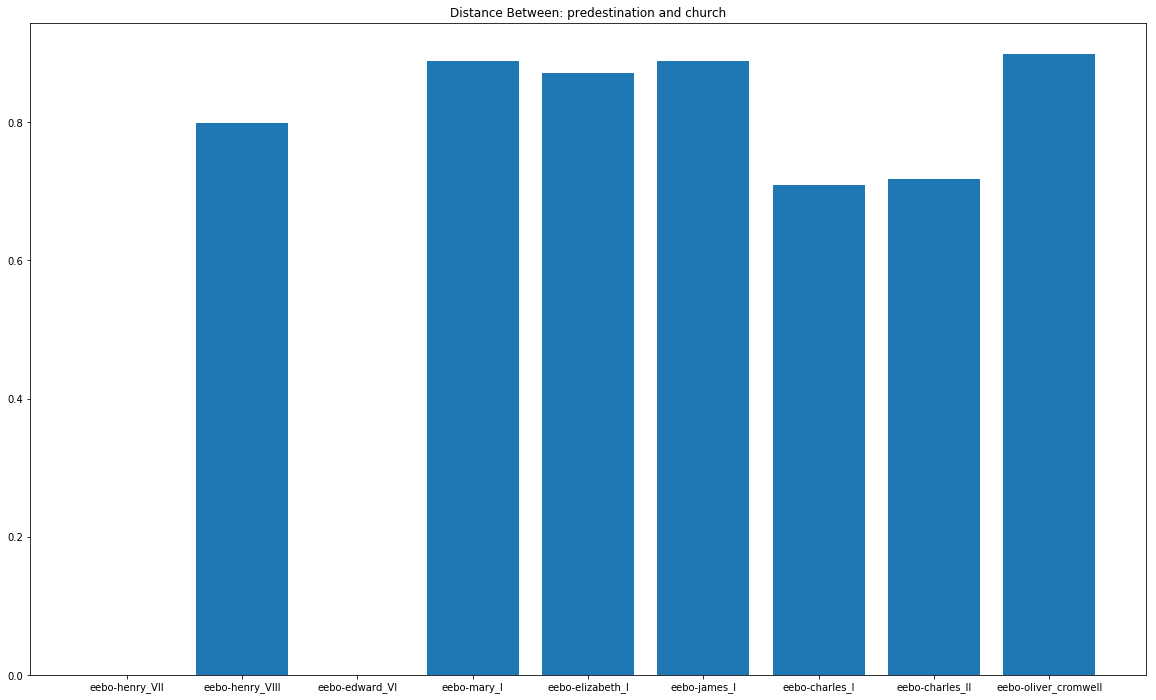

In [6]:
# select two terms
# distance is cosine similarity
interact(plot_distances, 
         term1="predestination",
         term2="church");

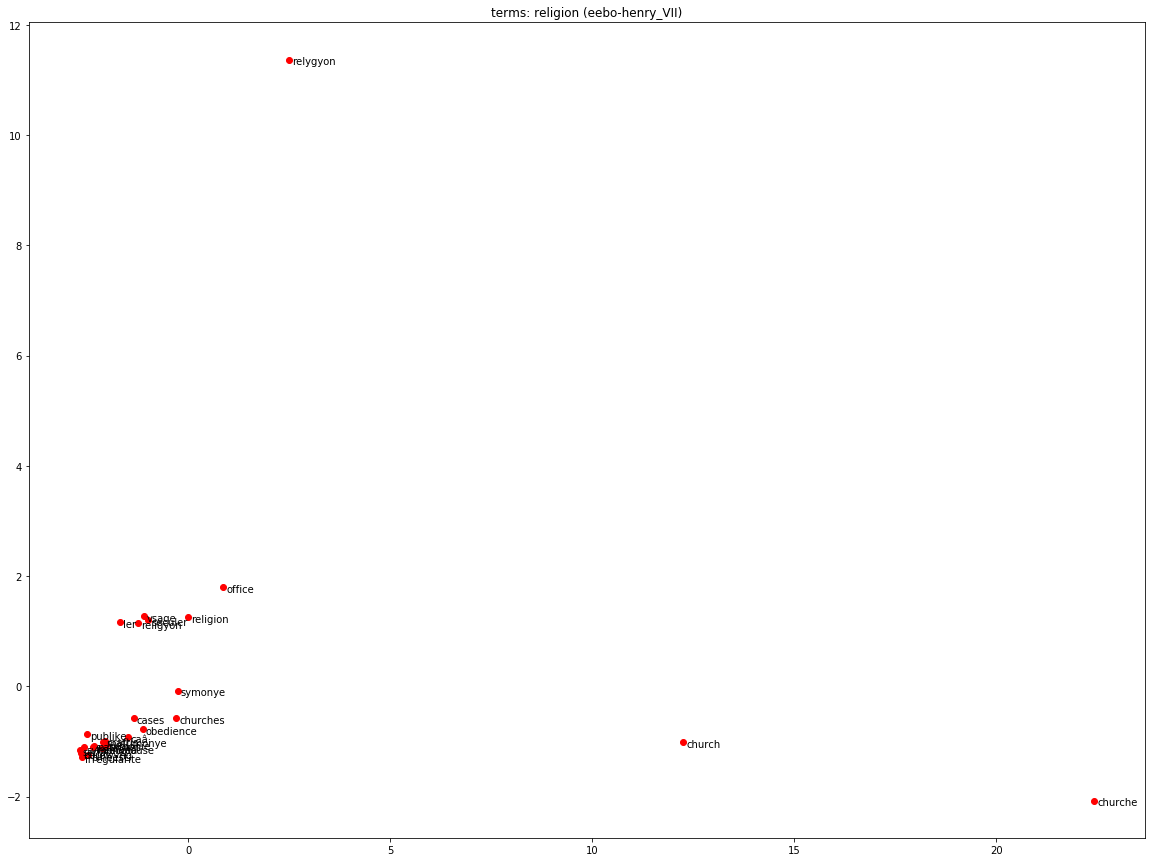

<function __main__.scatter_terms(terms, model_name)>

In [7]:
# interactive slider

model_list = [x[0] for x in eebo_models]
interact(scatter_terms,terms="religion", 
         model_name=widgets.SelectionSlider(description='Period',
                                            options=model_list))